In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
root_1929_slices_per_sec_mean = np.load('root/root_slices_per_sec_mean_1929.npy')
root_3858_slices_per_sec_mean = np.load('root/root_slices_per_sec_mean_3858.npy')
root_7716_slices_per_sec_mean = np.load('root/root_slices_per_sec_mean_7716.npy')

root_1929_slices_per_sec_errs = np.load('root/root_slices_per_sec_errs_1929.npy')
root_3858_slices_per_sec_errs = np.load('root/root_slices_per_sec_errs_3858.npy')
root_7716_slices_per_sec_errs = np.load('root/root_slices_per_sec_errs_7716.npy')

In [3]:
hepnos_s4v2_1929_slices_per_sec_mean = np.load('hepnos/s4v2/slices_per_sec_mean_1929.npy')
hepnos_s4v2_3858_slices_per_sec_mean = np.load('hepnos/s4v2/slices_per_sec_mean_3858.npy')
hepnos_s4v2_7716_slices_per_sec_mean = np.load('hepnos/s4v2/slices_per_sec_mean_7716.npy')

hepnos_s4v2_1929_slices_per_sec_errs = np.load('hepnos/s4v2/slices_per_sec_errs_1929.npy')
hepnos_s4v2_3858_slices_per_sec_errs = np.load('hepnos/s4v2/slices_per_sec_errs_3858.npy')
hepnos_s4v2_7716_slices_per_sec_errs = np.load('hepnos/s4v2/slices_per_sec_errs_7716.npy')

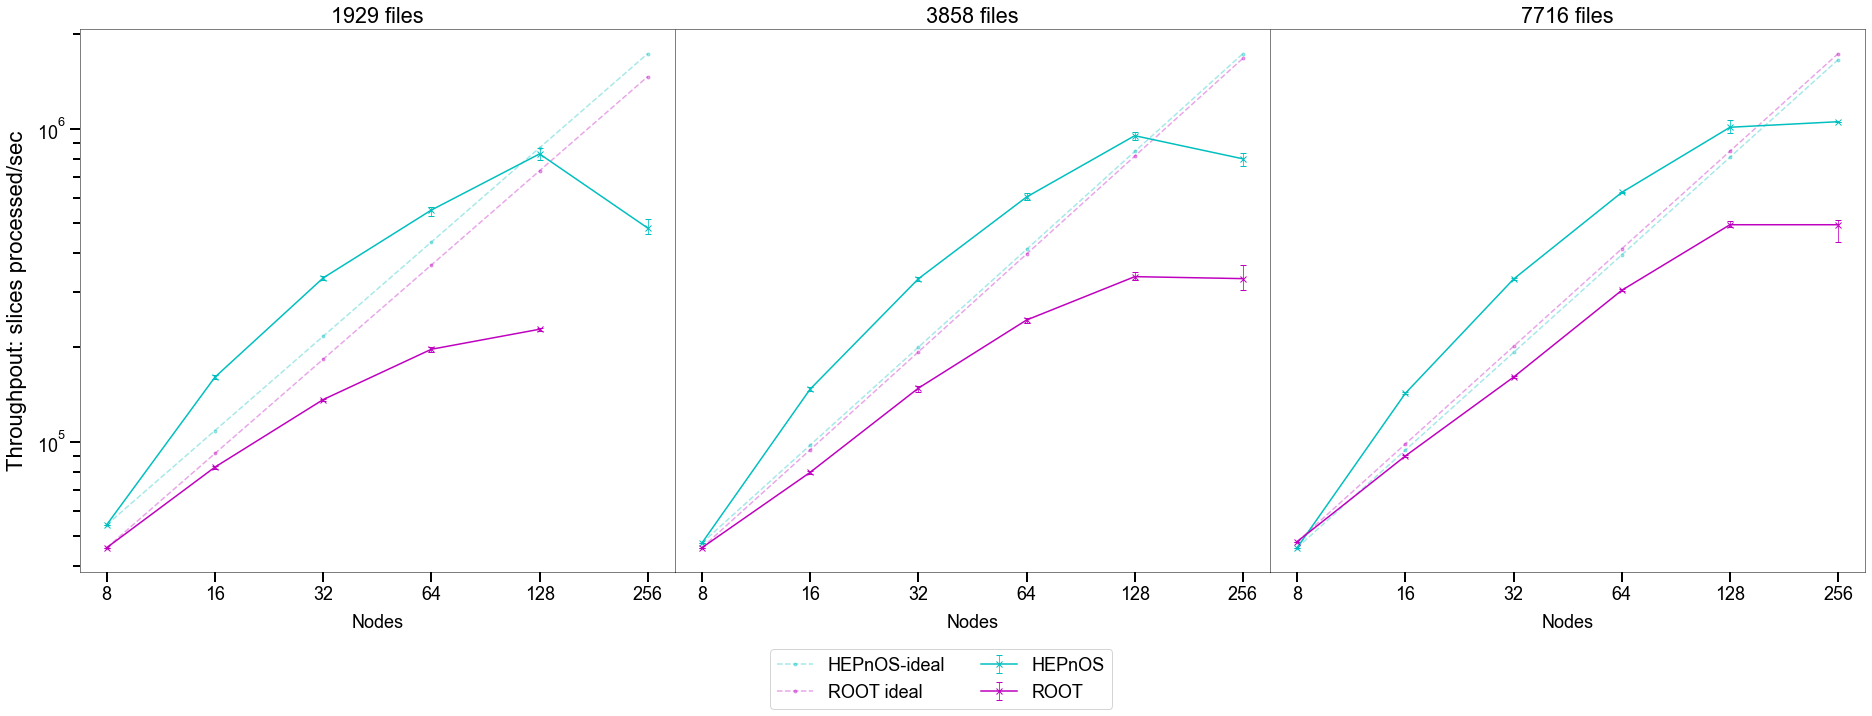

In [5]:
nodes = np.array([8,16,32,64,128,256])

mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['lines.markersize'] = 6

f,ax = plt.subplots(1,3)
f.set_size_inches(32,10)
f.subplots_adjust(wspace=0)

_elinewidth = 0.75
_capsize = 3

ax[0].set_title('1929 files')
ax[0].errorbar(np.arange(6), hepnos_s4v2_1929_slices_per_sec_mean, yerr=hepnos_s4v2_1929_slices_per_sec_errs, fmt='c-x', ecolor='c', elinewidth=_elinewidth, capsize=_capsize, label='HEPnOS')
ax[0].plot(np.arange(6), (hepnos_s4v2_1929_slices_per_sec_mean[0])*(nodes/nodes[0]), 'c--.', alpha=0.35)
ax[0].errorbar(np.arange(5), root_1929_slices_per_sec_mean[:-1], yerr=root_1929_slices_per_sec_errs[:, :-1], fmt='m-x', ecolor='m', elinewidth=_elinewidth, capsize=_capsize, label='ROOT')
ax[0].plot(np.arange(6), (root_1929_slices_per_sec_mean[0])*(nodes/nodes[0]), 'm--.', alpha=0.35)

ax[1].set_title('3858 files')
ax[1].errorbar(np.arange(6), hepnos_s4v2_3858_slices_per_sec_mean, yerr=hepnos_s4v2_3858_slices_per_sec_errs, fmt='c-x', ecolor='c', elinewidth=_elinewidth, capsize=_capsize, label='HEPnOS')
ax[1].plot(np.arange(6), (hepnos_s4v2_3858_slices_per_sec_mean[0])*(nodes/nodes[0]), 'c--.', alpha=0.35, label='HEPnOS-ideal')
ax[1].errorbar(np.arange(6), root_3858_slices_per_sec_mean, yerr=root_3858_slices_per_sec_errs, fmt='m-x', ecolor='m', elinewidth=_elinewidth, capsize=_capsize, label='ROOT')
ax[1].plot(np.arange(6), (root_3858_slices_per_sec_mean[0])*(nodes/nodes[0]), 'm--.', alpha=0.35, label='ROOT ideal')

ax[2].set_title('7716 files')
ax[2].errorbar(np.arange(6), hepnos_s4v2_7716_slices_per_sec_mean, yerr=hepnos_s4v2_7716_slices_per_sec_errs, fmt='c-x', ecolor='c', elinewidth=_elinewidth, capsize=_capsize, label='HEPnOS')
ax[2].plot(np.arange(6), (hepnos_s4v2_7716_slices_per_sec_mean[0])*(nodes/nodes[0]), 'c--.', alpha=0.35)
ax[2].errorbar(np.arange(6), root_7716_slices_per_sec_mean, yerr=root_7716_slices_per_sec_errs, fmt='m-x', ecolor='m', elinewidth=_elinewidth, capsize=_capsize, label='ROOT')
ax[2].plot(np.arange(6), (root_7716_slices_per_sec_mean[0])*(nodes/nodes[0]), 'm--.', alpha=0.35)

# Common legend for all plots!
lgd = ax[1].legend(bbox_to_anchor=(0.75, -0.125), ncol=2)

for _ax in ax:
    _ax.set_xticks(np.arange(6))
    _ax.set_xticklabels(nodes)
    _ax.set_xlabel('Nodes', labelpad=10)
    _ax.set_yscale('log', base=10)
    #_ax.set_ylim(10**4,10**7)
    _ax.xaxis.set_tick_params(which='major', size=10, width=2)
    _ax.xaxis.set_tick_params(which='minor', size=7, width=2)
    _ax.yaxis.set_tick_params(which='major', size=10, width=2)
    _ax.yaxis.set_tick_params(which='minor', size=7, width=2)
    if _ax==ax[0]:
        _ax.set_ylabel('Throughpout: slices processed/sec', labelpad=10, size=22)
    else:
        _ax.yaxis.set_ticklabels([])
        _ax.yaxis.set_ticks([])
        _ax.yaxis.set_ticks([], minor=True)
        
plt.savefig("slice_throughput.png", dpi=250, bbox_inches="tight")